# WeatherPy

- By Vigneshwar Cheriath

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city  + "&APPID=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | warburg
Processing Record 5 of Set 1 | ntoum
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | mbanza-ngungu
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | sassandra
Processing Record 11 of Set 1 | mersa matruh
Processing Record 12 of Set 1 | tayshet
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | tazacorte
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | akureyri
Processing Record 19 of Set 1 | fontenay-le-comte
Processing Record 20 of Set 1 | hammerfest
Processing Record 21 of Set 1 | poso
Processing Record 22 of Set 1 | kapyl'
City not found. Skip

Processing Record 39 of Set 4 | grand falls-windsor
Processing Record 40 of Set 4 | paradip garh
Processing Record 41 of Set 4 | mandimba
City not found. Skipping...
Processing Record 42 of Set 4 | petauke
Processing Record 43 of Set 4 | yuzhno-kurilsk
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | fort bragg
Processing Record 46 of Set 4 | langtoucun
Processing Record 47 of Set 4 | cambrai
Processing Record 48 of Set 4 | sumbawa besar
Processing Record 49 of Set 4 | nuuk
Processing Record 0 of Set 5 | ushuaia
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | conduaga
Processing Record 3 of Set 5 | inhambane
Processing Record 4 of Set 5 | winchester
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | jamestown
Processing Record 7 of Set 5 | bandarbeyla
Processing Record 8 of Set 5 | al badari
Processing Record 9 of Set 5 | ixtapa
Processing Record 10 of Set 5 | varash
City not found. Skipping...
Processing Record 11 o

Processing Record 28 of Set 8 | gisborne
Processing Record 29 of Set 8 | beli
Processing Record 30 of Set 8 | villa tecolutilla
Processing Record 31 of Set 8 | kununurra
Processing Record 32 of Set 8 | copala
Processing Record 33 of Set 8 | madimba
Processing Record 34 of Set 8 | tual
Processing Record 35 of Set 8 | taesal-li
Processing Record 36 of Set 8 | santa rosa
Processing Record 37 of Set 8 | tanabe
Processing Record 38 of Set 8 | kodok
City not found. Skipping...
Processing Record 39 of Set 8 | la mira
Processing Record 40 of Set 8 | cascais
Processing Record 41 of Set 8 | cockburn town
Processing Record 42 of Set 8 | walvis bay
Processing Record 43 of Set 8 | kudahuvadhoo
Processing Record 44 of Set 8 | plunge
Processing Record 45 of Set 8 | maloye ganyushkino
Processing Record 46 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 47 of Set 8 | haiku-pauwela
Processing Record 48 of Set 8 | saipan
Processing Record 49 of Set 8 | belgrade
Processing Record 0 of 

Processing Record 14 of Set 12 | chernyshevskiy
Processing Record 15 of Set 12 | massawa
Processing Record 16 of Set 12 | sandnessjoen
Processing Record 17 of Set 12 | machico
Processing Record 18 of Set 12 | la sarre
Processing Record 19 of Set 12 | yelovo
Processing Record 20 of Set 12 | amahai
Processing Record 21 of Set 12 | fiambala
Processing Record 22 of Set 12 | chichiriviche
Processing Record 23 of Set 12 | muroto-misakicho
Processing Record 24 of Set 12 | berezovyy
Processing Record 25 of Set 12 | tura
Processing Record 26 of Set 12 | egilsstadir
Processing Record 27 of Set 12 | coahuayana de hidalgo
Processing Record 28 of Set 12 | mesa
Processing Record 29 of Set 12 | remire-montjoly
Processing Record 30 of Set 12 | masina
Processing Record 31 of Set 12 | tweed heads
Processing Record 32 of Set 12 | bathsheba
Processing Record 33 of Set 12 | sechura
Processing Record 34 of Set 12 | tofol
Processing Record 35 of Set 12 | kiffa
Processing Record 36 of Set 12 | sonsorol villag

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,15.31,82,0,6.17,CA,1691504760
1,luderitz,-26.6481,15.1594,22.76,45,0,10.26,NA,1691504760
2,port-aux-francais,-49.3500,70.2167,1.71,78,92,16.73,TF,1691504760
3,warburg,51.5000,9.1667,18.17,88,75,4.63,DE,1691504760
4,ntoum,0.3833,9.7833,26.87,52,66,4.13,GA,1691504760


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,15.31,82,0,6.17,CA,1691504760
1,luderitz,-26.6481,15.1594,22.76,45,0,10.26,NaN,1691504760
2,port-aux-francais,-49.3500,70.2167,1.71,78,92,16.73,TF,1691504760
3,warburg,51.5000,9.1667,18.17,88,75,4.63,DE,1691504760
4,ntoum,0.3833,9.7833,26.87,52,66,4.13,GA,1691504760


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

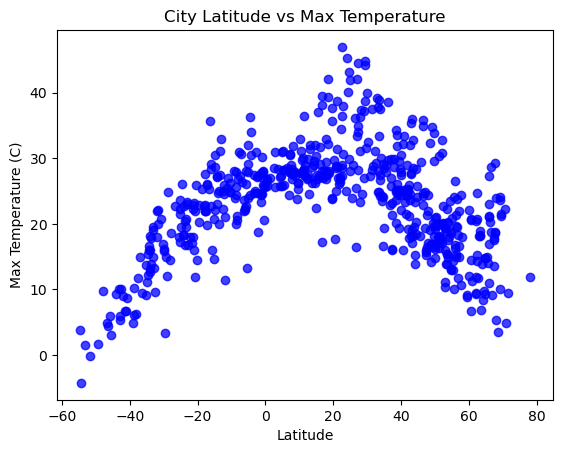

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

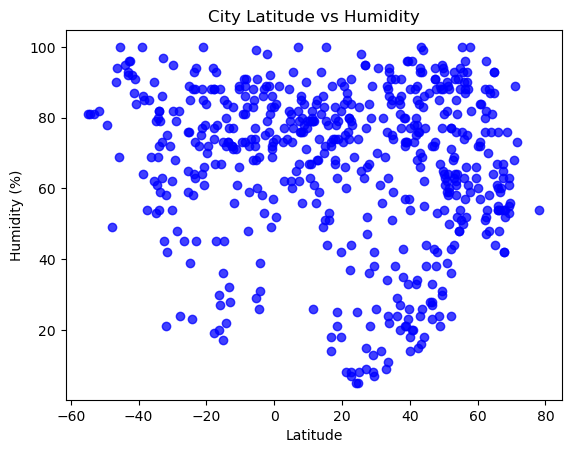

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

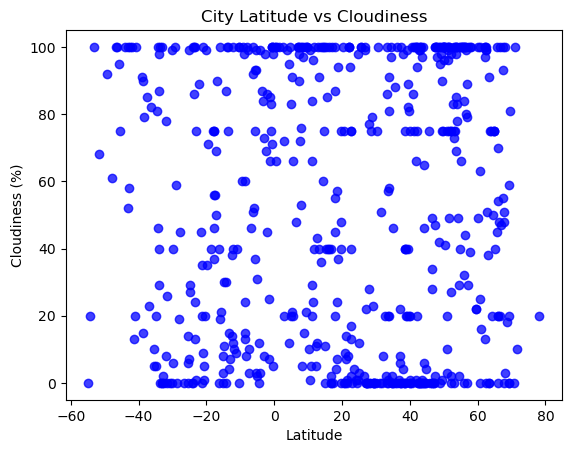

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

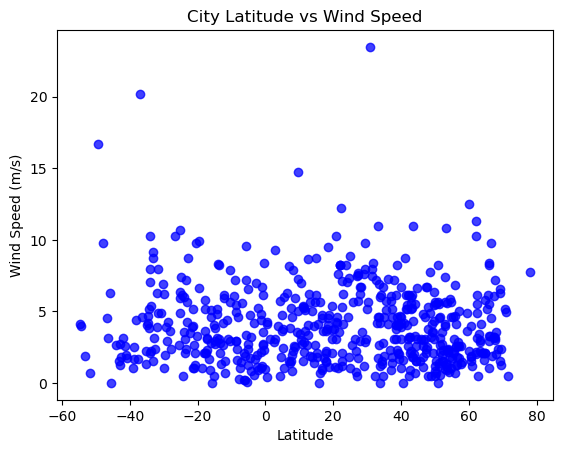

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregplot(x_values, y_values, title = "", xlabel = "", ylabel = ""):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color = "blue")
    plt.plot(x_values,regress_values,"r-")
    #plt.annotate(line_eq,(0,50),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    print(f"The linear correlation equation is: {line_eq}")
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,15.31,82,0,6.17,CA,1691504760
3,warburg,51.5000,9.1667,18.17,88,75,4.63,DE,1691504760
4,ntoum,0.3833,9.7833,26.87,52,66,4.13,GA,1691504760
7,bethel,41.3712,-73.4140,25.29,78,75,5.14,US,1691504760
9,sassandra,4.9500,-6.0833,25.75,81,83,4.75,CI,1691504761


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,luderitz,-26.6481,15.1594,22.76,45,0,10.26,NaN,1691504760
2,port-aux-francais,-49.3500,70.2167,1.71,78,92,16.73,TF,1691504760
5,waitangi,-43.9535,-176.5597,9.34,95,100,2.68,NZ,1691504760
6,mbanza-ngungu,-5.2500,14.8667,31.99,29,3,2.73,CD,1691504760
8,papatowai,-46.5619,169.4708,4.81,90,100,4.56,NZ,1691504760


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6242664777736601
The linear correlation equation is: y = -0.26x + 34.21


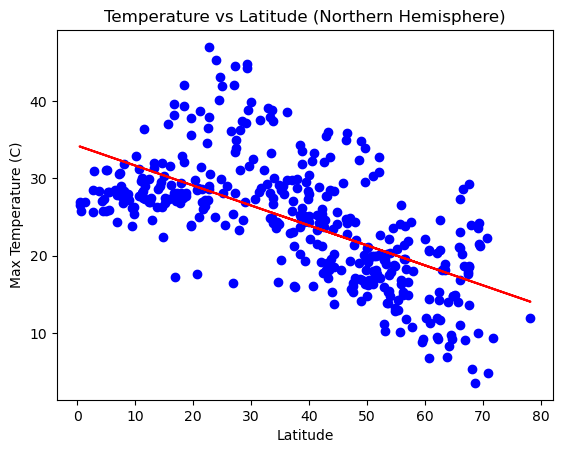

In [15]:
# Linear regression on Northern Hemisphere
linregplot(northern_hemi_df['Lat'],
           northern_hemi_df['Max Temp'],
           "Temperature vs Latitude (Northern Hemisphere)",
           "Latitude",
           "Max Temperature (C)")

The r-value is: 0.8314728744095327
The linear correlation equation is: y = 0.47x + 29.58


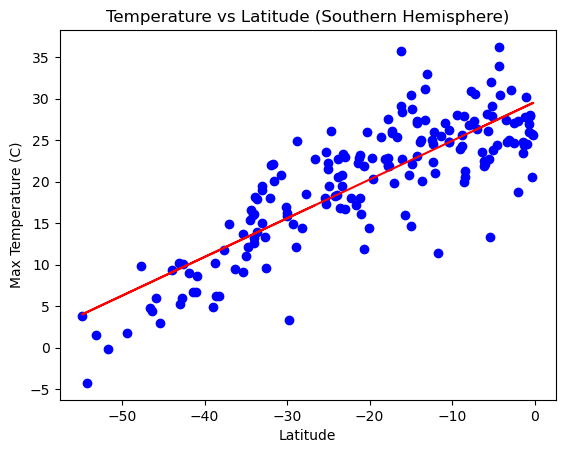

In [16]:
# Linear regression on Southern Hemisphere
linregplot(southern_hemi_df['Lat'],
           southern_hemi_df['Max Temp'],
           "Temperature vs Latitude (Southern Hemisphere)",
           "Latitude",
           "Max Temperature (C)")

**Discussion about the linear relationship:** In the Northern Hemisphere, the temperatures get colder as you move North. In the Southern Hemisphere, the temperatures get colder as you move South. This makes sense because as you move away from the Equator and towards the Poles the temperature gets colder.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03068908166177724
The linear correlation equation is: y = -0.04x + 66.33


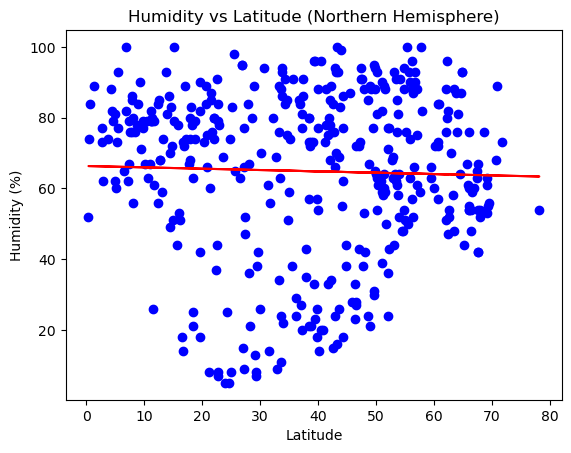

In [17]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'],
           northern_hemi_df['Humidity'],
           "Humidity vs Latitude (Northern Hemisphere)",
           "Latitude",
           "Humidity (%)")

The r-value is: -0.12206899177879209
The linear correlation equation is: y = -0.17x + 67.88


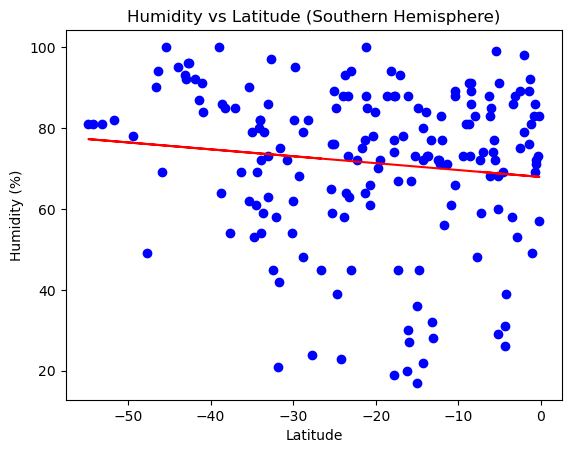

In [18]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'],
           southern_hemi_df['Humidity'],
           "Humidity vs Latitude (Southern Hemisphere)",
           "Latitude",
           "Humidity (%)")

**Discussion about the linear relationship:** We observe very little correlation between the Latitude and Humidity for either Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03979816397281525
The linear correlation equation is: y = 0.09x + 48.77


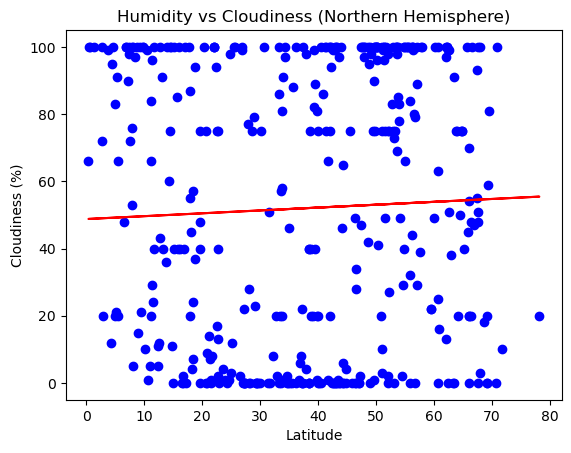

In [19]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'],
           northern_hemi_df['Cloudiness'],
           "Humidity vs Cloudiness (Northern Hemisphere)",
           "Latitude",
           "Cloudiness (%)")

The r-value is: 0.0013514128207795014
The linear correlation equation is: y = 0.0x + 49.84


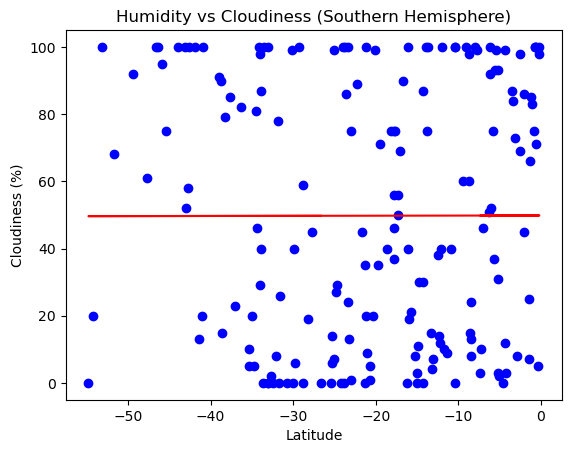

In [20]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'],
           southern_hemi_df['Cloudiness'],
           "Humidity vs Cloudiness (Southern Hemisphere)",
           "Latitude",
           "Cloudiness (%)")

**Discussion about the linear relationship:** We did not observe a correlation between Cloudiness and Latitude for either hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.08620517850721145
The linear correlation equation is: y = -0.01x + 4.43


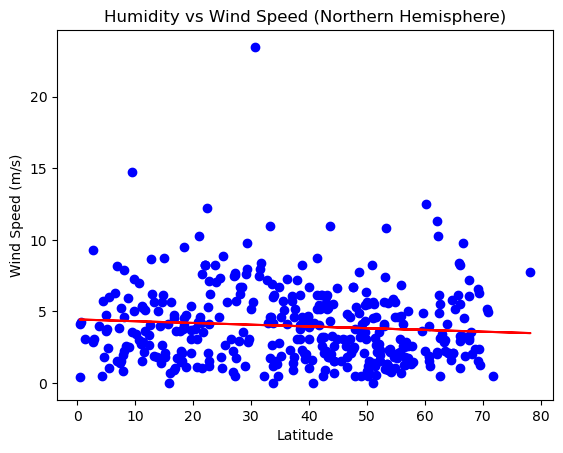

In [21]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'],
           northern_hemi_df['Wind Speed'],
           "Humidity vs Wind Speed (Northern Hemisphere)",
           "Latitude",
           "Wind Speed (m/s)")

The r-value is: -0.14551680942702275
The linear correlation equation is: y = -0.03x + 3.33


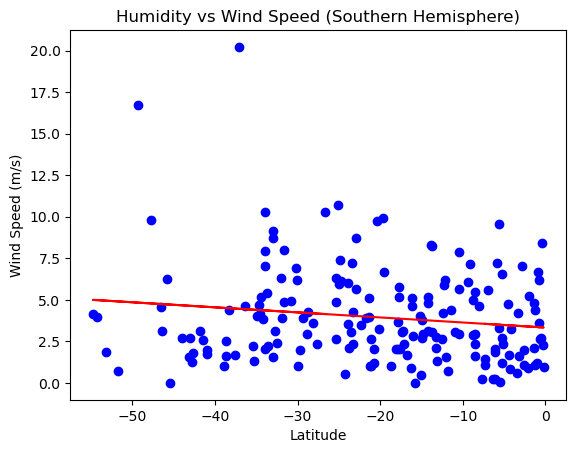

In [22]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'],
           southern_hemi_df['Wind Speed'],
           "Humidity vs Wind Speed (Southern Hemisphere)",
           "Latitude",
           "Wind Speed (m/s)")

**Discussion about the linear relationship:** We did not observe a meaningful correlation between Latitude and Wind Speed for either Hemisphere